# California Housing Prices

Los datos están sacados del censo de California en 1990.

Simplemente descargamos un único archivo comprimido, housing.tgz, que contiene un archivo de valores separados por comas (CSV) llamado housing.csv con todos los datos.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#definimos qué backend queremos que utilice Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
from six.moves import urllib #paquete que reúne diversos módulos para trabajar con URLs

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #Github repo con archivos
HOUSING_PATH = os.path.join("datasets", "housing") # path.join join one or more path components "intelligently"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # carpeta del repo con los datos

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # si no existe directorio, lo crea en la linea de abajo
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path)# con urlretrieve ->
    # -> Copy a network object denoted by a URL to a local file
    housing_tgz = tarfile.open(tgz_path) # leemos / abrimos fichero
    housing_tgz.extractall(path=housing_path) # Extract all members from the archive to the current wrkng drectory
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) #leemos el csv con pandas

Cada fila representa un distrito.  
Todos los atributos son numéricos, menos el ocean_proximity.

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#Nos quedamos con los 10 primeras filas
housing[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
#Sacar filas del dataframe
len(housing.index)

20640

In [8]:
# General info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#Obtener numero de casas en cada rango de distancia
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Para sacar la media podemos hacerlo con Numpy o con Pandas

In [10]:
#Numpy - sacamos array
poblacion = np.array(housing['population'])
print(poblacion)


[ 322. 2401.  496. ... 1007.  741. 1387.]


In [11]:
#Aplicamos los métodos de numpy al array
print("Población media: ", poblacion.mean())
print("Desviación estándar: ", poblacion.std())

Población media:  1425.4767441860465
Desviación estándar:  1132.434687757615


### Aplicar método mean() a la columna del df de pandas

In [12]:
#Valor medio de una columna
housing["population"].mean()

1425.4767441860465

In [13]:
#Mediana de las columnas seleccionadas
housing[["total_bedrooms", "population"]].median()

total_bedrooms     435.0
population        1166.0
dtype: float64

In [14]:
#Estadísticas agregadas de múltiples columnas (valores numéricos)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
# Se pueden definir estadísticas agregadas en vez de las predefinidas por el describe()

housing.agg({'total_rooms': ['min', 'max', 'median', 'skew'], #skew = 4.1 mucha asimetría
      'population': ['min', 'max', 'median', 'mean']})

,total_rooms,population
max,39320.000000,35682.000000
mean,NaN,1425.476744
median,2127.000000,1166.000000
min,2.000000,3.000000
skew,4.147343,NaN


In [16]:
#Podemos sacar los percentiles

print("25th percentile:   ", np.percentile(poblacion, 25))
print("Median:            ", np.median(poblacion))
print("75th percentile:   ", np.percentile(poblacion, 75))

25th percentile:    787.0
Median:             1166.0
75th percentile:    1725.0


### Podemos ayudarnos de las visualizaciones para entender los datos

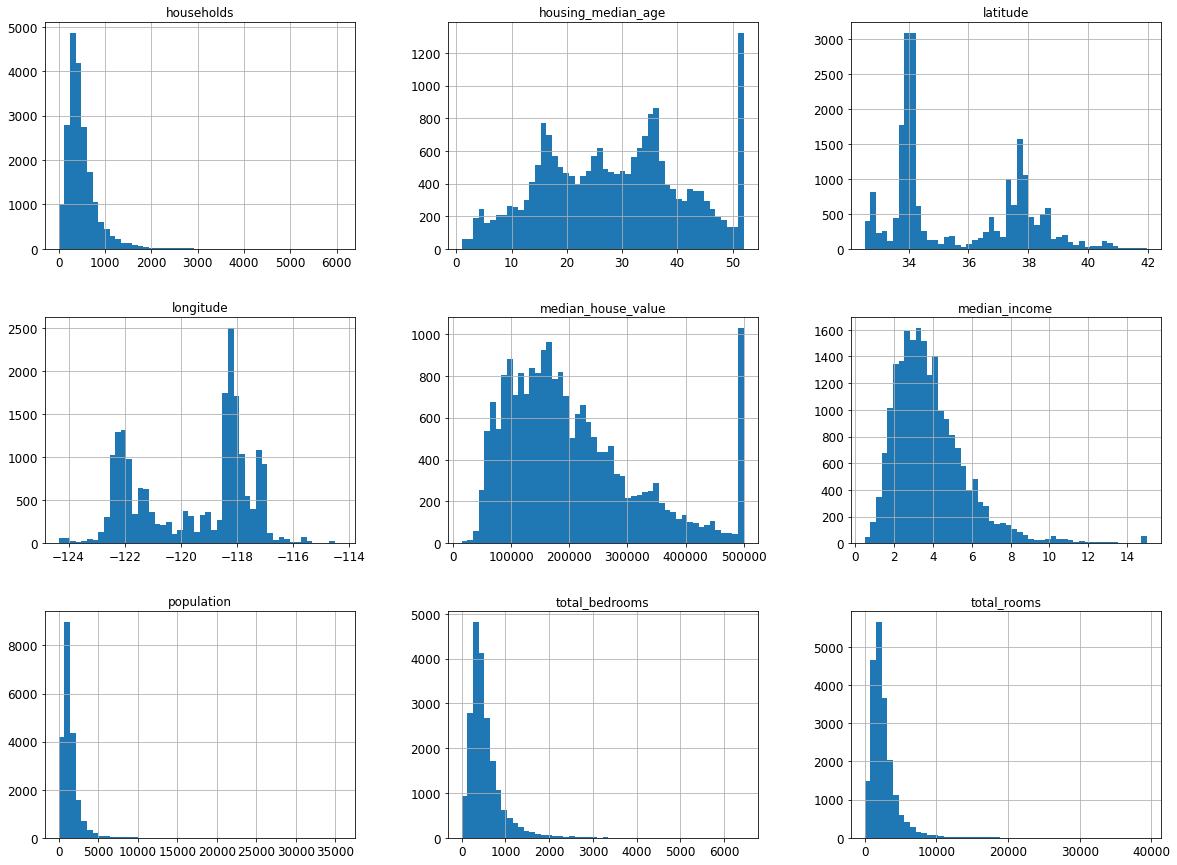

In [17]:
import matplotlib.pyplot as plt

#Histograma de todas las columnas
housing.hist(bins=50, figsize=(20,15))

plt.show()
## Representación la distribución de un conjunto de datos

Primero, el atributo de Median Income no parece estar expresado en dólares estadounidenses (USD). Los datos se han escalado y limitado a 15 y a 0,5 para ingresos medios más bajos. Los números representan aproximadamente decenas de miles de dólares (por ejemplo, 3 en realidad significa alrededor de $ 30,000). Trabajar con atributos preprocesados es común en Machine Learning y no es necesariamente un problema, pero debe intentar comprender cómo se calcularon los datos.  
El median house value está topado en 500.000. Podríamos tratar de encontrar datos reales para pisos con un valor mayor o eliminarlos del modelo, para que no aprenda que no hay casas con un valor superior a 500k

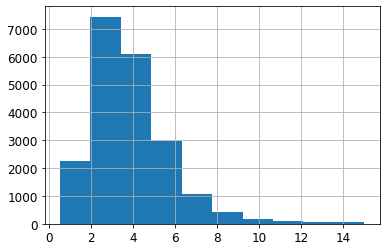

In [18]:
#Para ver una variable en particular
housing["median_income"].hist()

Discover and visualize the data to gain insights

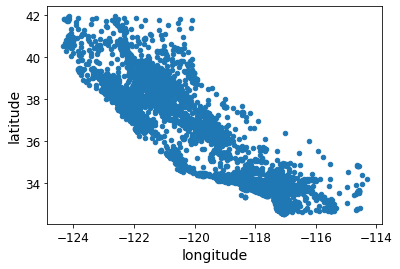

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude")

# Un gráfico de tipo scatter requiere de valores numéricos tanto en el eje X como en el Y

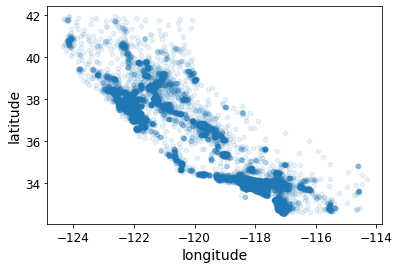

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)#transparency


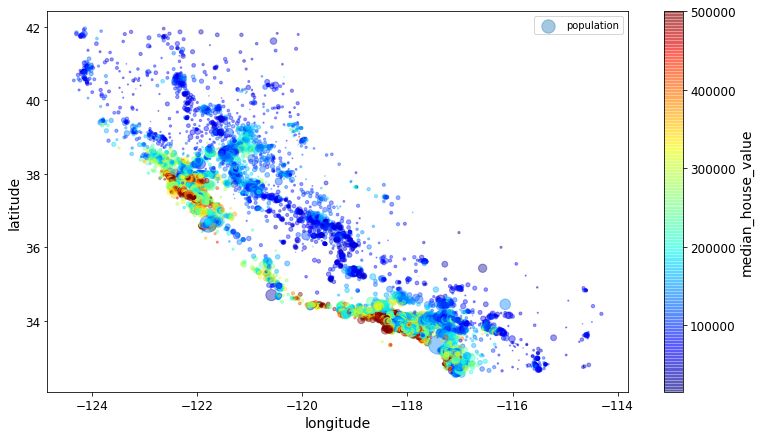

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(13,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

# Con sharex= False conseguimos que cada subplot sea independiente

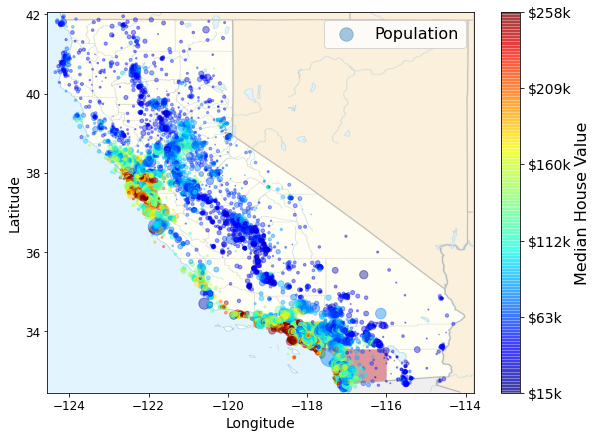

In [22]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

In [23]:
#Creamos la matriz de correlaciones
corr_matrix = housing.corr()

In [24]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [25]:
#Esto es la matriz de correlaciones ordenada.
# Podemos acceder a variables concretas de la matriz

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D0E3B50C8>,
      dtype=object)

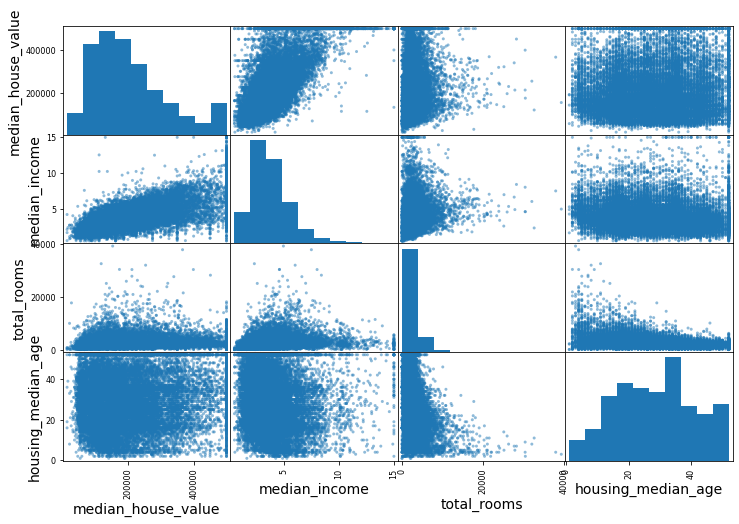

In [26]:
#Para observar la relacion entre variables, podemos dibujar la matriz de covarianza (scatter_matrix)
#Creamos una lista de los atributos que queremos observar

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

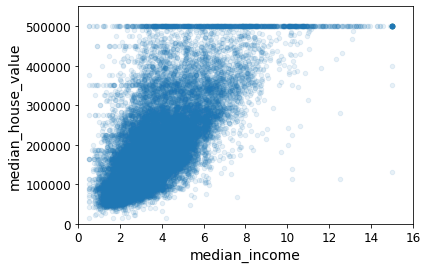

In [27]:
# Si queremos obervar simplemente dos variables, podemos pintar un scatter
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
#save_fig("income_vs_house_value_scatterplot")

### En muchas ocasiones, podemos crear datos nuevos a partir de datos ya existentes, por ejemplo:

In [28]:
#Número de habitaciones por casa y numero de dormitorios por casa
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
print(housing["rooms_per_household"])

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20640, dtype: float64


In [29]:
#Sacamos las columnas para comprobar que están
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room'],
      dtype='object')

In [30]:
# Como se relacionan nuestras dos nuevas variables creadas
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

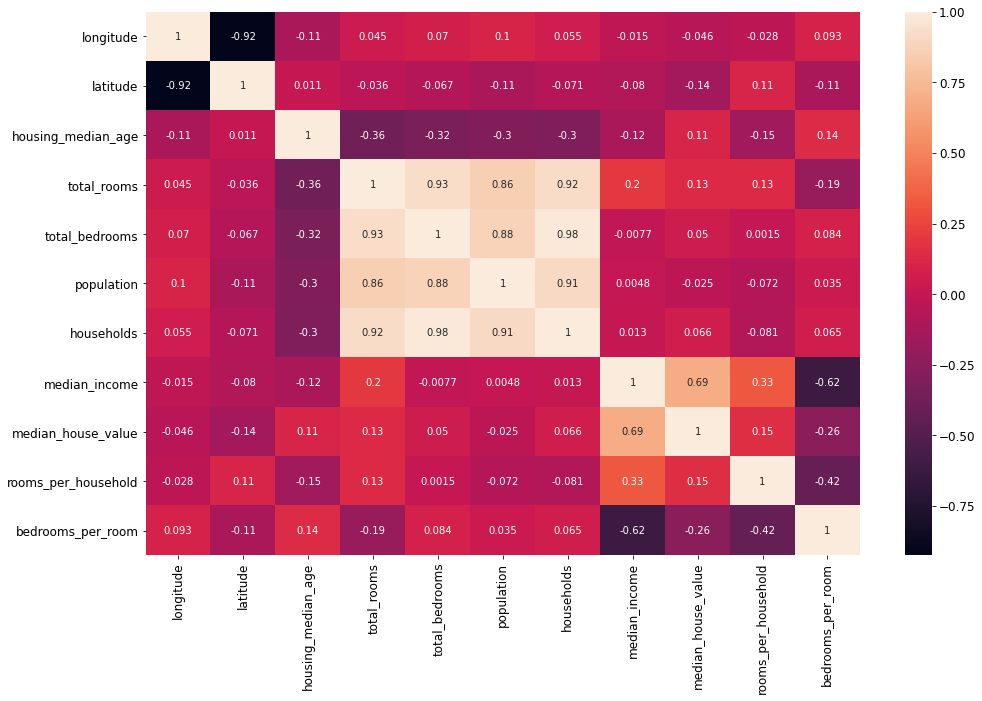

In [31]:
#Pintamos un mapa de calor de correlaciones

import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(), annot = True)
